In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

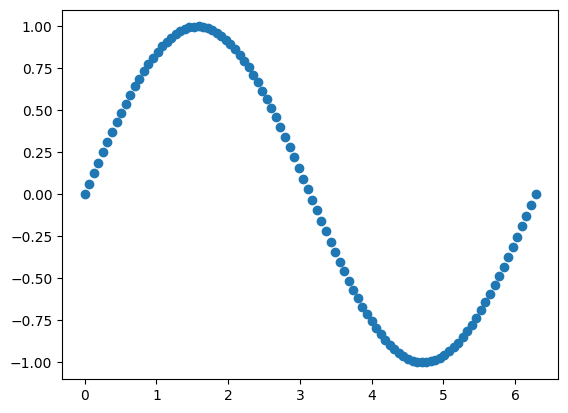

In [2]:
dev = qml.device("default.qubit", wires=2)
X = np.linspace(0, 2 * np.pi, 100)
m, c = np.random.rand(2)
y = np.sin(X)
# y = m * X + c
# y = np.ones(len(X)) * 0.7
plt.scatter(X, y)

In [19]:
@qml.qnode(dev)
def circuit(params, x):
    # data encode
    qml.RX(x, wires=0)

    # variational circuit
    qml.Rot(*params[:3], wires=0)
    qml.Hadamard(wires=1)
    qml.RY(params[3], wires=1)
    qml.CNOT(wires=[0,1])
    qml.RZ(params[4], wires=1)

    # measurement
    return [qml.expval(qml.Z(0)), qml.expval(qml.Z(1))]

params_init = np.random.randn(5, requires_grad=True)

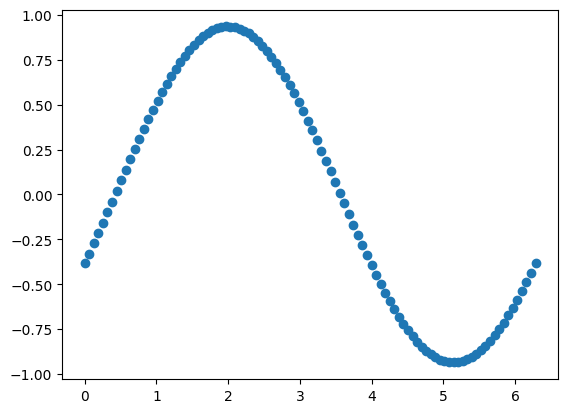

In [22]:
y_preds = [circuit(params_init, xi)[0] for xi in X]
plt.scatter(X, y_preds)
plt.show()

In [13]:
print(qml.draw(circuit)(params_init, X[0]))

0: ──RX(0.00)──Rot(0.27,0.74,0.13)─╭●────────────┤  <Z>
1: ──H─────────RY(-1.02)───────────╰X──RZ(-0.23)─┤     


In [25]:
def cost(params, X, y, index=0):
    y_pred = circuit(params, X)[index]
    return (y_pred - y) ** 2

In [30]:
optim = qml.AdamOptimizer(stepsize=0.01)

params = params_init
for i in range(10):
    cost_l = []
    cost_prev = 0
    for j in range(len(X)):
        params, cost_ = optim.step_and_cost(cost, params, X=X[j], y=y[j], index=0)
        cost_l.append(cost_)
    cost_l = np.mean(cost_l)
    # if abs(cost_l-cost_prev) < 1e-7:break
    cost_prev = cost_l
    if i%5==0 or i==99:
        print(f"Iter: {i:3d} | Cost: {cost_l:.7f}")

Iter:   0 | Cost: 0.0195543
Iter:   5 | Cost: 0.0000003


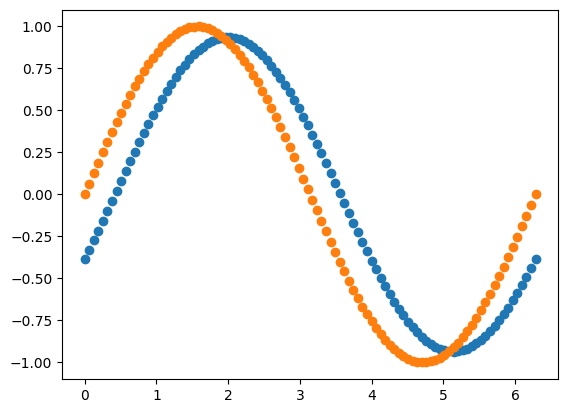

[tensor([-1.96185746e-04,  6.32163871e-02,  1.26374410e-01,
          1.89023568e-01,  2.50911594e-01,  3.11789288e-01,
          3.71411517e-01,  4.29538202e-01,  4.85935289e-01,
          5.40375686e-01,  5.92640181e-01,  6.42518323e-01,
          6.89809270e-01,  7.34322599e-01,  7.75879070e-01,
          8.14311350e-01,  8.49464685e-01,  8.81197526e-01,
          9.09382095e-01,  9.33904904e-01,  9.54667208e-01,
          9.71585403e-01,  9.84591367e-01,  9.93632729e-01,
          9.98673083e-01,  9.99692132e-01,  9.96685775e-01,
          9.89666115e-01,  9.78661419e-01,  9.63716000e-01,
          9.44890035e-01,  9.22259333e-01,  8.95915017e-01,
          8.65963168e-01,  8.32524391e-01,  7.95733332e-01,
          7.55738136e-01,  7.12699849e-01,  6.66791771e-01,
          6.18198758e-01,  5.67116477e-01,  5.13750618e-01,
          4.58316066e-01,  4.01036038e-01,  3.42141179e-01,
          2.81868638e-01,  2.20461112e-01,  1.58165866e-01,
          9.52337429e-02,  3.19181466e-0

In [31]:
y_preds = [circuit(params_init, xi)[0] for xi in X]
plt.scatter(X, y_preds)
plt.scatter(X, y)
plt.show()
y_pred